<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/Q10_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coverage probability for Z-Interval (known σ): 94.0%
Coverage probability for Z-Interval (unknown σ, using s): 91.0%
Coverage probability for T-Interval (unknown σ, using s): 95.0%


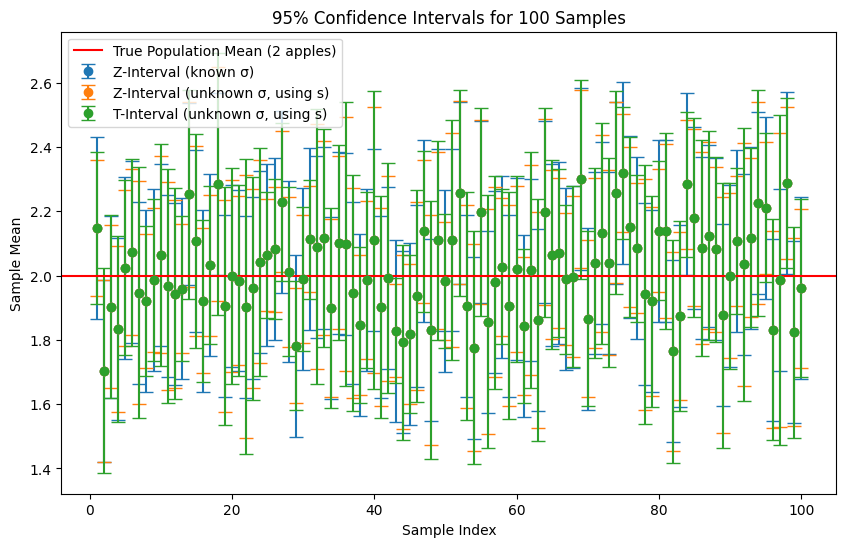

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given parameters
population_mean = 2  # Population mean (μ)
population_std = 0.5  # Population standard deviation (σ)
sample_size = 12  # Sample size (n)
confidence_level = 0.95  # Confidence level (95%)

# Create a random seed for reproducibility
np.random.seed(42)

# Initialize lists to store the results
z_intervals_known = []  # Z-intervals (with known σ)
z_intervals_unknown = []  # Z-intervals (with unknown σ)
t_intervals_unknown = []  # T-intervals (with unknown σ)

# Z-critical value for 95% confidence (for both known and unknown σ)
z_alpha_2 = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# T-critical value for 95% confidence (for unknown σ)
t_alpha_2 = stats.t.ppf(1 - (1 - confidence_level) / 2, df=sample_size - 1)

# Simulate 100 samples
for _ in range(100):
    # Generate a random sample from the population (normal distribution)
    sample = np.random.normal(population_mean, population_std, sample_size)

    # Calculate sample statistics
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)

    # 1. Z-Interval (known σ)
    z_margin_of_error = z_alpha_2 * (population_std / np.sqrt(sample_size))
    z_lower = sample_mean - z_margin_of_error
    z_upper = sample_mean + z_margin_of_error
    z_intervals_known.append((z_lower, z_upper))

    # 2. Z-Interval (unknown σ, using sample std dev s)
    z_margin_of_error_s = z_alpha_2 * (sample_std / np.sqrt(sample_size))
    z_lower_s = sample_mean - z_margin_of_error_s
    z_upper_s = sample_mean + z_margin_of_error_s
    z_intervals_unknown.append((z_lower_s, z_upper_s))

    # 3. T-Interval (unknown σ, using sample std dev s)
    t_margin_of_error = t_alpha_2 * (sample_std / np.sqrt(sample_size))
    t_lower = sample_mean - t_margin_of_error
    t_upper = sample_mean + t_margin_of_error
    t_intervals_unknown.append((t_lower, t_upper))

# True population mean
true_mean = population_mean

# Function to count how many times the true mean is inside the CI
def count_coverage(intervals, true_mean):
    return sum(1 for (lower, upper) in intervals if lower <= true_mean <= upper)

# Calculate coverage probabilities
coverage_z_known = count_coverage(z_intervals_known, true_mean) / 100
coverage_z_unknown = count_coverage(z_intervals_unknown, true_mean) / 100
coverage_t_unknown = count_coverage(t_intervals_unknown, true_mean) / 100

print(f"Coverage probability for Z-Interval (known σ): {coverage_z_known * 100}%")
print(f"Coverage probability for Z-Interval (unknown σ, using s): {coverage_z_unknown * 100}%")
print(f"Coverage probability for T-Interval (unknown σ, using s): {coverage_t_unknown * 100}%")

# Plot the confidence intervals for all 100 samples
plt.figure(figsize=(10, 6))

# Plot for Z-interval (known σ)
z_lower_known = [interval[0] for interval in z_intervals_known]
z_upper_known = [interval[1] for interval in z_intervals_known]
plt.errorbar(range(1, 101), np.mean(z_intervals_known, axis=1), yerr=[np.array(z_upper_known) - np.mean(z_intervals_known, axis=1)], fmt='o', label='Z-Interval (known σ)', capsize=5)

# Plot for Z-interval (unknown σ, using s)
z_lower_unknown = [interval[0] for interval in z_intervals_unknown]
z_upper_unknown = [interval[1] for interval in z_intervals_unknown]
plt.errorbar(range(1, 101), np.mean(z_intervals_unknown, axis=1), yerr=[np.array(z_upper_unknown) - np.mean(z_intervals_unknown, axis=1)], fmt='o', label='Z-Interval (unknown σ, using s)', capsize=5)

# Plot for T-interval (unknown σ, using s)
t_lower_unknown = [interval[0] for interval in t_intervals_unknown]
t_upper_unknown = [interval[1] for interval in t_intervals_unknown]
plt.errorbar(range(1, 101), np.mean(t_intervals_unknown, axis=1), yerr=[np.array(t_upper_unknown) - np.mean(t_intervals_unknown, axis=1)], fmt='o', label='T-Interval (unknown σ, using s)', capsize=5)

# Plot the true mean line
plt.axhline(y=true_mean, color='r', linestyle='-', label='True Population Mean (2 apples)')

# Labels and legend
plt.xlabel('Sample Index')
plt.ylabel('Sample Mean')
plt.title('95% Confidence Intervals for 100 Samples')
plt.legend()

plt.show()
